In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Importing the training and test dataset
train_dataframe = pd.read_csv('/content/drive/MyDrive/Google Stock Price Prediction/Google_Stock_Price_Train.csv')
training_set = train_dataframe.iloc[:,1:2].values

In [45]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [46]:
# Creating a data structure with 60(its an experimental value) timesteps
X_train = []
Y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60: i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [47]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [48]:
# Importing the keras libraries and packages for building RNN
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout

In [49]:
# Initializing the RNN
regressor = Sequential()

In [50]:
# Adding the first LSTM layer and some dropout regularisation
regressor.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

## From Second LSTM layers onwards the input shape is not required

In [51]:
# Adding the second LSTM layer and some dropout regularisation
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))

In [52]:
# Adding the Third LSTM layer and some dropout regularisation
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))

In [53]:
# Adding the Fourth LSTM layer and some dropout regularisation
regressor.add(LSTM(50))
regressor.add(Dropout(0.2))

In [54]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [55]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
# Fitting the RNN to the training set
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 125ms/step - loss: 0.0415
Epoch 2/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0070
Epoch 3/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0050
Epoch 11/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0051
Epoch 13/100

### Here onwards we are making the predictions and visualizing the results and performance of our model.

In [57]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/MyDrive/Google Stock Price Prediction/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

We trained our model to predict the stock price according to the trends of previous 60 days. So to predict the stock prices of Jan'17 we need datas of time starting from T-60 days. But that data is available on the training set. So we need to concatenate them. 

In [58]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((train_dataframe['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range (60, 80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [59]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

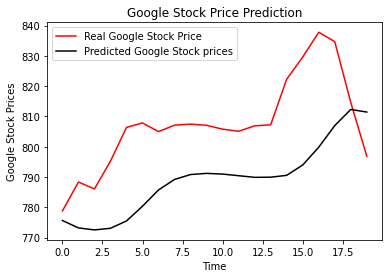

In [60]:
# The Visualization part
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'black', label = 'Predicted Google Stock prices')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Prices')
plt.legend()
plt.show()